---
title: "The Lorenz attractor"
date: 2025-02-15
description: "Building a simple ODE integrator and discovering chaos."
---

In 1963, Edward Lorenz was modeling atmospheric convection with a simplified system of three differential equations. He discovered that tiny changes in initial conditions led to wildly different outcomes—the butterfly effect. Here I'll implement the same system and see chaos emerge from simple code.

## The equations

The Lorenz system is:

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$

Three variables, three parameters. The classic chaotic behavior appears with $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$.

::: {.column-margin}
Lorenz was using $\rho = 28$ because it represents a Rayleigh number—a ratio of buoyancy to viscous forces in the fluid.
:::

## A simple integrator

Before using SciPy's solvers, it's worth implementing Runge-Kutta 4 by hand. The algorithm advances the solution by taking a weighted average of four derivative estimates:

In [1]:
#| code-fold: false

import numpy as np
import matplotlib.pyplot as plt

# Load custom style (assumes file is in path)
# plt.style.use('computational_physics.mplstyle')

def lorenz(state, sigma=10, rho=28, beta=8/3):
    """Compute derivatives for Lorenz system."""
    x, y, z = state
    return np.array([
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ])

def rk4_step(f, state, dt):
    """Single step of 4th-order Runge-Kutta."""
    k1 = f(state)
    k2 = f(state + dt/2 * k1)
    k3 = f(state + dt/2 * k2)
    k4 = f(state + dt * k3)
    return state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

def integrate(f, initial, dt, steps):
    """Integrate system for given number of steps."""
    trajectory = np.zeros((steps + 1, len(initial)))
    trajectory[0] = initial
    state = initial.copy()
    for i in range(steps):
        state = rk4_step(f, state, dt)
        trajectory[i + 1] = state
    return trajectory

## The attractor

Running the integrator reveals the famous butterfly shape:

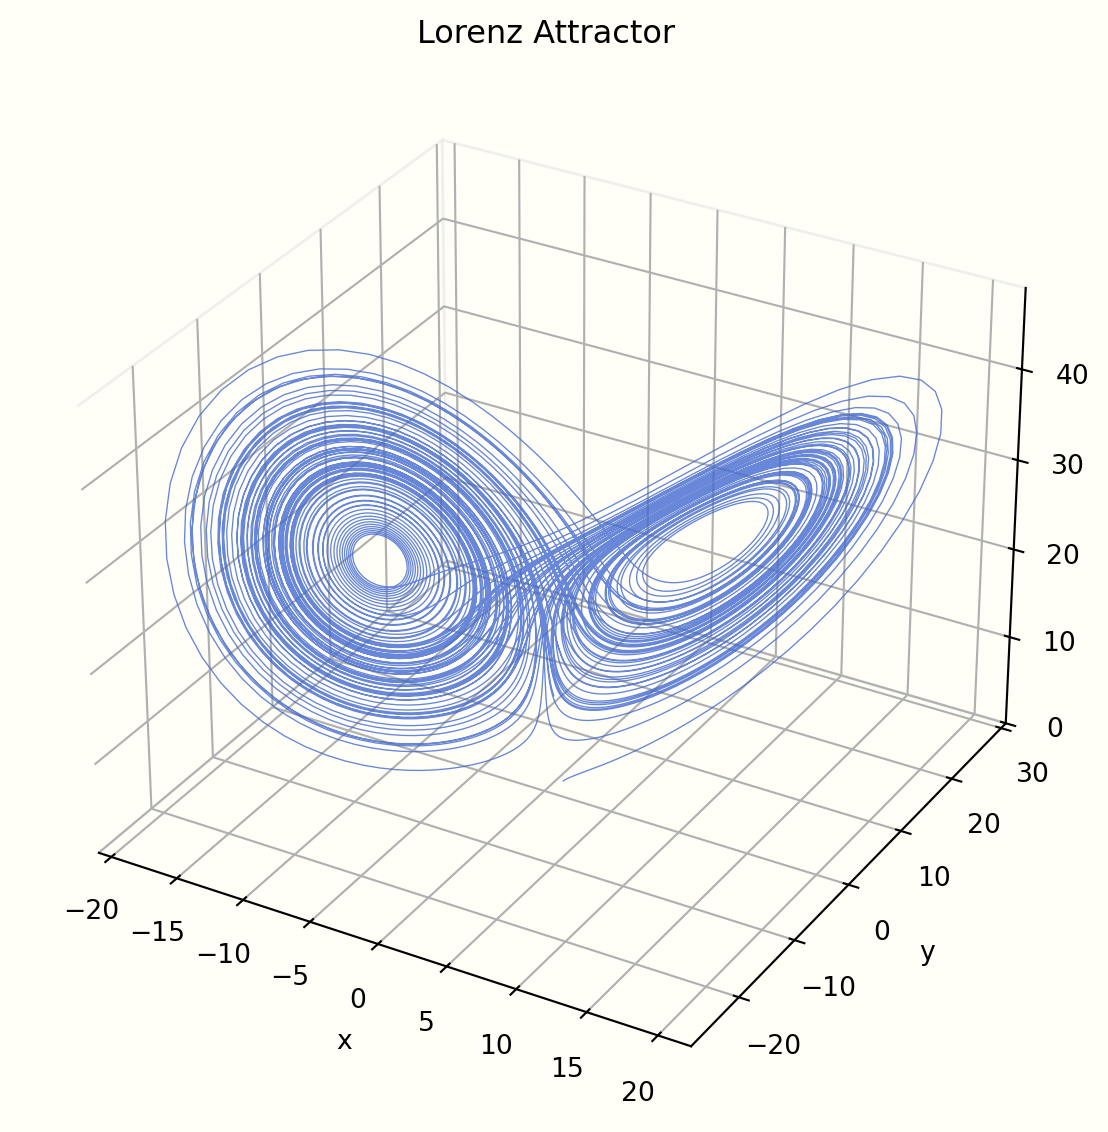

In [2]:
#| label: fig-lorenz
#| fig-cap: The Lorenz attractor, computed with RK4 integration.

# Integrate
dt = 0.01
steps = 10000
initial = np.array([1.0, 1.0, 1.0])
trajectory = integrate(lorenz, initial, dt, steps)

# Plot
fig = plt.figure(figsize=(8, 6), facecolor='#fffff8')
ax = fig.add_subplot(111, projection='3d', facecolor='#fffff8')

ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 
        linewidth=0.5, color='#4269d0', alpha=0.8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz Attractor')

# Clean up the 3D plot
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('#e0e0e0')
ax.yaxis.pane.set_edgecolor('#e0e0e0')
ax.zaxis.pane.set_edgecolor('#e0e0e0')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The trajectory never repeats, never settles into a cycle, and never escapes to infinity. It's bounded but aperiodic—a strange attractor.

## Sensitivity to initial conditions

The hallmark of chaos is sensitive dependence on initial conditions. Two trajectories starting extremely close together will diverge exponentially:

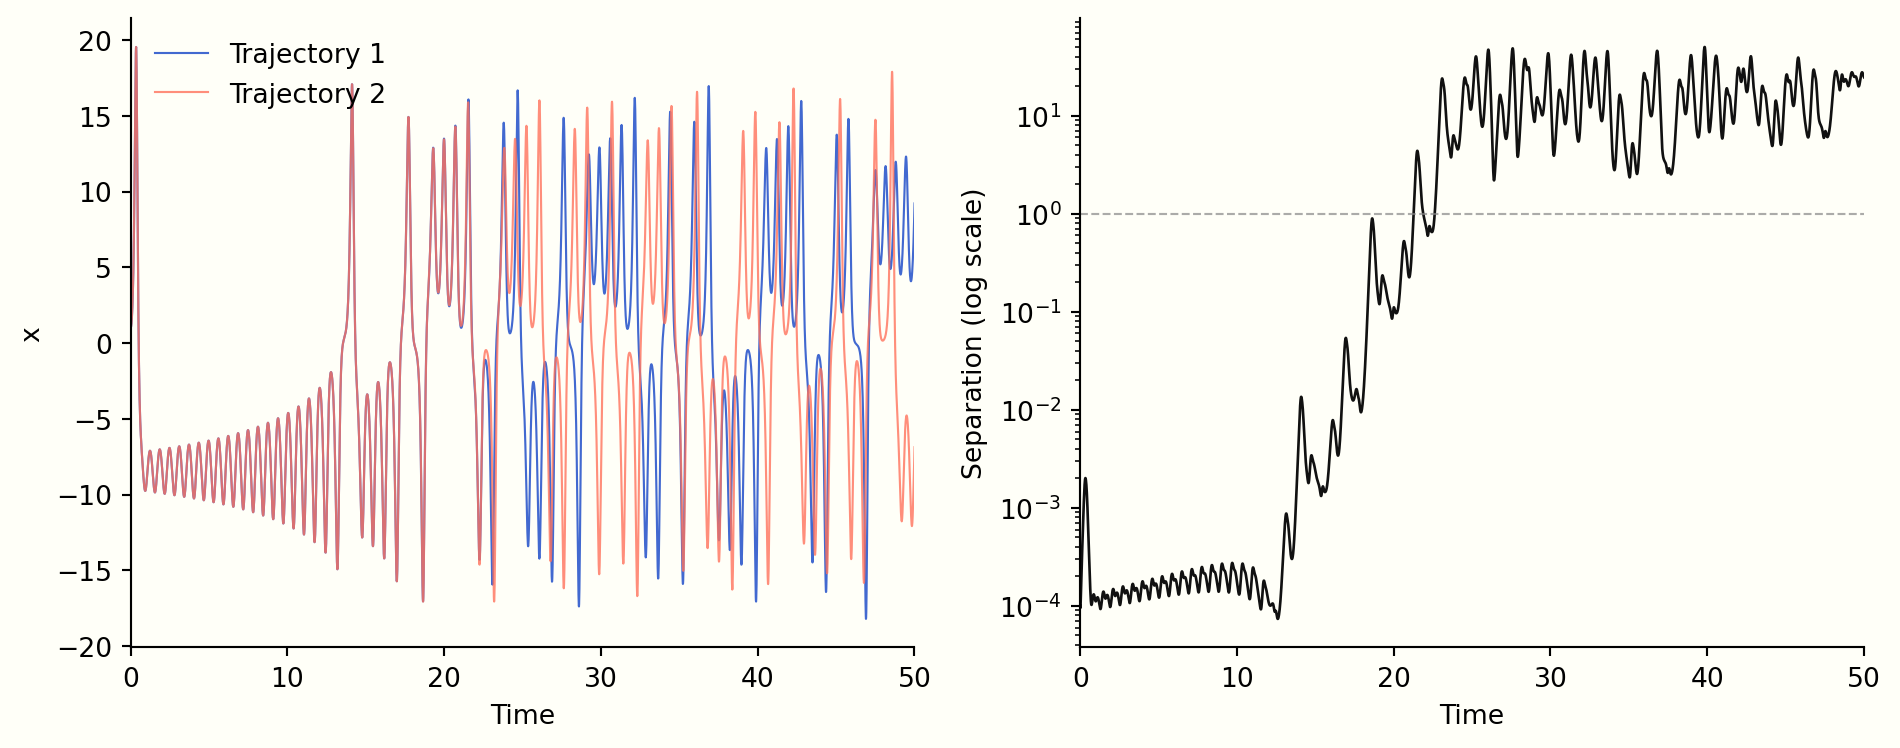

In [3]:
#| label: fig-divergence
#| fig-cap: Two trajectories with initial conditions differing by 0.0001 in x.

# Two very close initial conditions
initial_1 = np.array([1.0, 1.0, 1.0])
initial_2 = np.array([1.0001, 1.0, 1.0])  # differs by 0.0001 in x

traj_1 = integrate(lorenz, initial_1, dt, steps)
traj_2 = integrate(lorenz, initial_2, dt, steps)

# Compute separation over time
separation = np.linalg.norm(traj_1 - traj_2, axis=1)
time = np.arange(steps + 1) * dt

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='#fffff8')

# X coordinate over time
ax1.plot(time, traj_1[:, 0], color='#4269d0', linewidth=0.8, label='Trajectory 1')
ax1.plot(time, traj_2[:, 0], color='#ff725c', linewidth=0.8, label='Trajectory 2', alpha=0.8)
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_xlim(0, 50)
ax1.legend(frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_facecolor('#fffff8')

# Separation over time (log scale)
ax2.semilogy(time, separation, color='#111111', linewidth=1)
ax2.axhline(y=1, color='#888888', linestyle='--', linewidth=0.8, alpha=0.7)
ax2.set_xlabel('Time')
ax2.set_ylabel('Separation (log scale)')
ax2.set_xlim(0, 50)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_facecolor('#fffff8')

fig.tight_layout()
plt.show()

By $t \approx 25$, trajectories that started $10^{-4}$ apart have diverged completely. This is why long-term weather prediction is fundamentally limited—not because our models are wrong, but because the atmosphere is chaotic.

## What I learned

Implementing this from scratch, rather than just calling `scipy.integrate.odeint`, taught me several things:

1. **RK4 is remarkably simple.** The algorithm fits in a few lines, yet it's accurate enough for most purposes.

2. **Chaos isn't randomness.** The Lorenz system is completely deterministic. Given exact initial conditions, it produces exactly the same trajectory every time. The unpredictability comes from our inability to know initial conditions exactly.

3. **Visualization matters.** I spent more time on the plots than the integrator. That's appropriate—the goal is understanding, and good figures are how understanding gets communicated.

## Code

The complete code is on [GitHub](https://github.com/yourusername/computational-physics).